<a href="https://colab.research.google.com/github/111Vidya/AI-Fundametals/blob/main/AI_29May_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

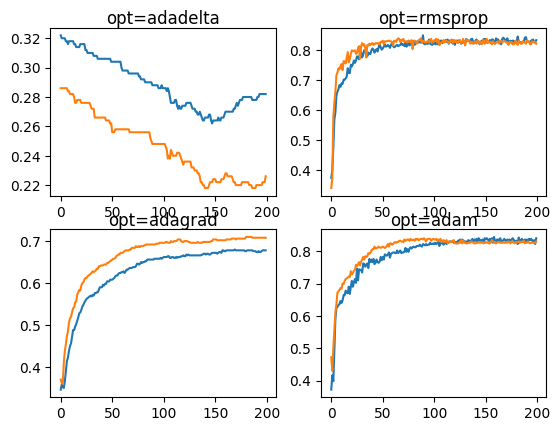

In [ ]:
# study of sgd with adaptive learning rates in the blobs problem
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('opt='+optimizer, pad=-80)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different optimizers
optimizers = ['adadelta', 'rmsprop', 'adagrad', 'adam']
for i in range(len(optimizers)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for an optimizer
	fit_model(trainX, trainy, testX, testy, optimizers[i])
# show learning curves
pyplot.show()

Adadelta not a good choice because of the variation in training and testing accuracy.
Also low levels of accuracy.
Adagrad - took 50 Epochs to reach 50% accuracy not very fast when compared to rest.
RMSProp- reached high levels of accuracy fast and testing accuracy is stable over time.
adam- also reached high levels of accuracy fastbut the accu levels dropped slightly over time.
RMSProp better optimizer in this experiment